<a href="https://colab.research.google.com/github/PiehTVH/Pytorch-Logistic-Regression/blob/main/Logistic_Regression_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download dataset

In [ ]:
!gdown https://raw.githubusercontent.com/PiehTVH/Pytorch-Logistic-Regression/main/Data/dataset_train.csv
!gdown https://raw.githubusercontent.com/PiehTVH/Pytorch-Logistic-Regression/main/Data/dataset_test.csv
!gdown https://raw.githubusercontent.com/PiehTVH/Pytorch-Logistic-Regression/main/Data/dataset_truth.csv

# Config

In [ ]:
import yaml
import numpy as np

class Config(object):
  def __init__(self, filepath):
    with open(filepath) as f:
      config = yaml.safe_load(f)

    for key in config.keys():
      setattr(self, key, config[key])

  def choosed_features(self):
    features = np.array(list(self.features.keys())) 
    mask = np.array(list(self.features.values()))
    return features[mask]

## Data describe

In [ ]:
import numpy as np
import pandas as pd
from abc import ABC

class HogwartsDataDescriber(pd.DataFrame, ABC):

  houses = ['Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff']
  colors = ['red', 'green', 'blue', 'yellow']

  @staticmethod
  def read_csv(csv_path):
    """
    Read .csv file
    :param csv_path: path to .csv file
    :return: HogwartsDataDescriber
    """
    return HogwartsDataDescriber(pd.read_csv(csv_path))
  
  def is_numeric(self, feature):
    """
    Check if column contains only numeric values
    :param feature: column name
    :return: Bool
    """
    return np.issubdtype(self[feature].dtype, np.number)
  
  def count(self, feature):
    """
    Number of the column elements without nans
    :param feature: column name
    :return: int
    """
    return len(self[feature].dropna())

  def mean(self, feature):
    """
    Mean value of the column elements
    :param feature: column name
    :return: float
    """
    return sum(self[feature].dropna()) / self.count(feature) 

  def std(self, feature):
    
    dif = self[feature].dropna()  - self.mean(feature)
    mean = sum(np.abs(dif)**2) / self.count(feature)
    return np.sqrt(mean)

  def min(self, feature):
    tmp = np.nan
    for val in self[feature].dropna():
      tmp = tmp if val > tmp else val
    return tmp

  def max(self, feature):
    tmp = np.nan
    for val in self[feature].dropna():
      tmp = tmp if val < tmp else val
    return tmp

  def percentile(self, feature, percent):
    arr = sorted(self[feature].dropna())
    k = (len(arr) - 1) * percent / 100
    f = np.floor(k)
    c = np.ceil(k)

    if f == c:
      return arr[int(k)]
    d0 = arr[int(f)] * (c - k)
    d1 = arr[int(c)] * (k - f)
    return d0 + d1

In [ ]:
pd.read_csv('/content/dataset_train.csv')

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


In [ ]:
def abbreviation(string):
  """
  Abbreviation for title
  :param string:
  :return: str
  """
  string_list = string.split(' ')
  abb = ''
  for word in string_list:
    abb += word[0]
  return abb

def describe(csv_path):
  data = HogwartsDataDescriber.read_csv(csv_path)
  print(f'{"":15} |{"Count":>12} |{"Mean":>12} |{"Std":>12} |{"Min":>13}'
          f'|{"Max":>12} |{"25%":>12} |{"50%":>12} |{"75%":>12} |')
  for feature in data.columns:
    if len(feature) > 15:
      print(f'{abbreviation(feature):15.15}', end=' |')
    else:
      print(f'{feature:15.15}', end=' |')
    print(f'{data.count(feature):>12.4f}', end=' |')
    
    if data.is_numeric(feature) and data.count(feature) != 0:
      # print(f'{data.count(feature):>12.4f}', end=' |')
      print(f'{data.mean(feature):>12.4f}', end=' |')
      print(f'{data.std(feature):>12.4f}', end=' |')
      print(f'{data.min(feature):>12.4f}', end=' |')
      print(f'{data.max(feature):>12.4f}', end=' |')
      print(f'{data.percentile(feature, 25):>12.4f}', end=' |')
      print(f'{data.percentile(feature, 50):>12.4f}', end=' |')
      print(f'{data.percentile(feature, 75):>12.4f}', end=' |\n')

    else:
      print(f'{"No numerical value to display":>64}')

data_path = 'Path to .csv file'
describe('/content/dataset_train.csv')

                |       Count |        Mean |         Std |          Min|         Max |         25% |         50% |         75% |
Index           |   1600.0000 |    799.5000 |    461.8801 |      0.0000 |   1599.0000 |    399.7500 |    799.5000 |   1199.2500 |
Hogwarts House  |   1600.0000 |                                   No numerical value to display
First Name      |   1600.0000 |                                   No numerical value to display
Last Name       |   1600.0000 |                                   No numerical value to display
Birthday        |   1600.0000 |                                   No numerical value to display
Best Hand       |   1600.0000 |                                   No numerical value to display
Arithmancy      |   1566.0000 |  49634.5702 |  16674.4796 | -24370.0000 | 104956.0000 |  38511.5000 |  49013.5000 |  60811.2500 |
Astronomy       |   1568.0000 |     39.7971 |    520.1323 |   -966.7405 |   1016.2119 |   -489.5514 |    260.2894 |    524.7719 |


## Histogram

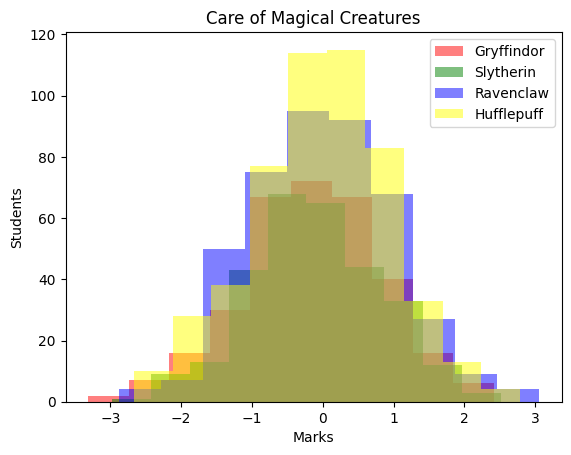

In [ ]:
import matplotlib.pyplot as plt

def histogram(plot, df, course):
  for house, color in zip(df.houses, df.colors):

    # choose course marks of students belonging to the house
    marks = df[course][df['Hogwarts House'] == house].dropna()
    plot.hist(x=marks, color=color, alpha=0.5)

def show_course_marks_distribution(csv_path, course):
  df = HogwartsDataDescriber.read_csv(csv_path)
  _, ax = plt.subplots()

  histogram(ax, df, course)
  ax.set_title(course)
  ax.legend(df.houses, frameon='False')
  ax.set_xlabel('Marks')
  ax.set_ylabel('Students')
  plt.show()

csv_path = '/content/dataset_train.csv'
course = 'Care of Magical Creatures'
show_course_marks_distribution(csv_path, course)

## Scatterplot

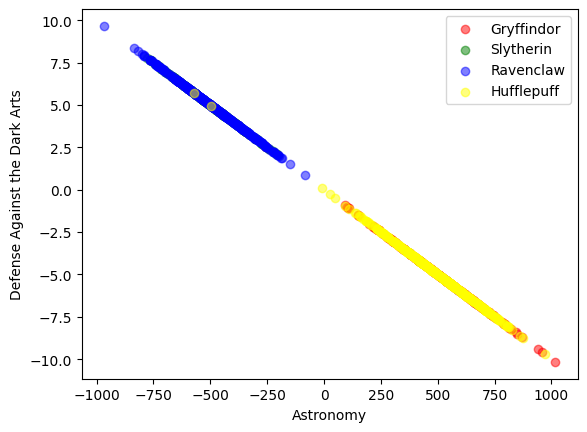

In [ ]:
data_path = '/content/dataset_train.csv'
def scatter_plot(plot, df, course1, course2):
  
  for house, color in zip(df.houses, df.colors):
    x = df[course1][df['Hogwarts House'] == house] 
    y = df[course2][df['Hogwarts House'] == house]

    plot.scatter(x, y, color=color, alpha=0.5)

def show_scatter_plot(csv_path, course1, course2):
  df = HogwartsDataDescriber.read_csv(csv_path)
  _, ax = plt.subplots()

  scatter_plot(ax, df, course1, course2)
  ax.set_xlabel(course1)
  ax.set_ylabel(course2)
  ax.legend(df.houses)
  plt.show()


course1 = 'Astronomy'
course2 = 'Defense Against the Dark Arts'
show_scatter_plot(data_path, course1, course2)

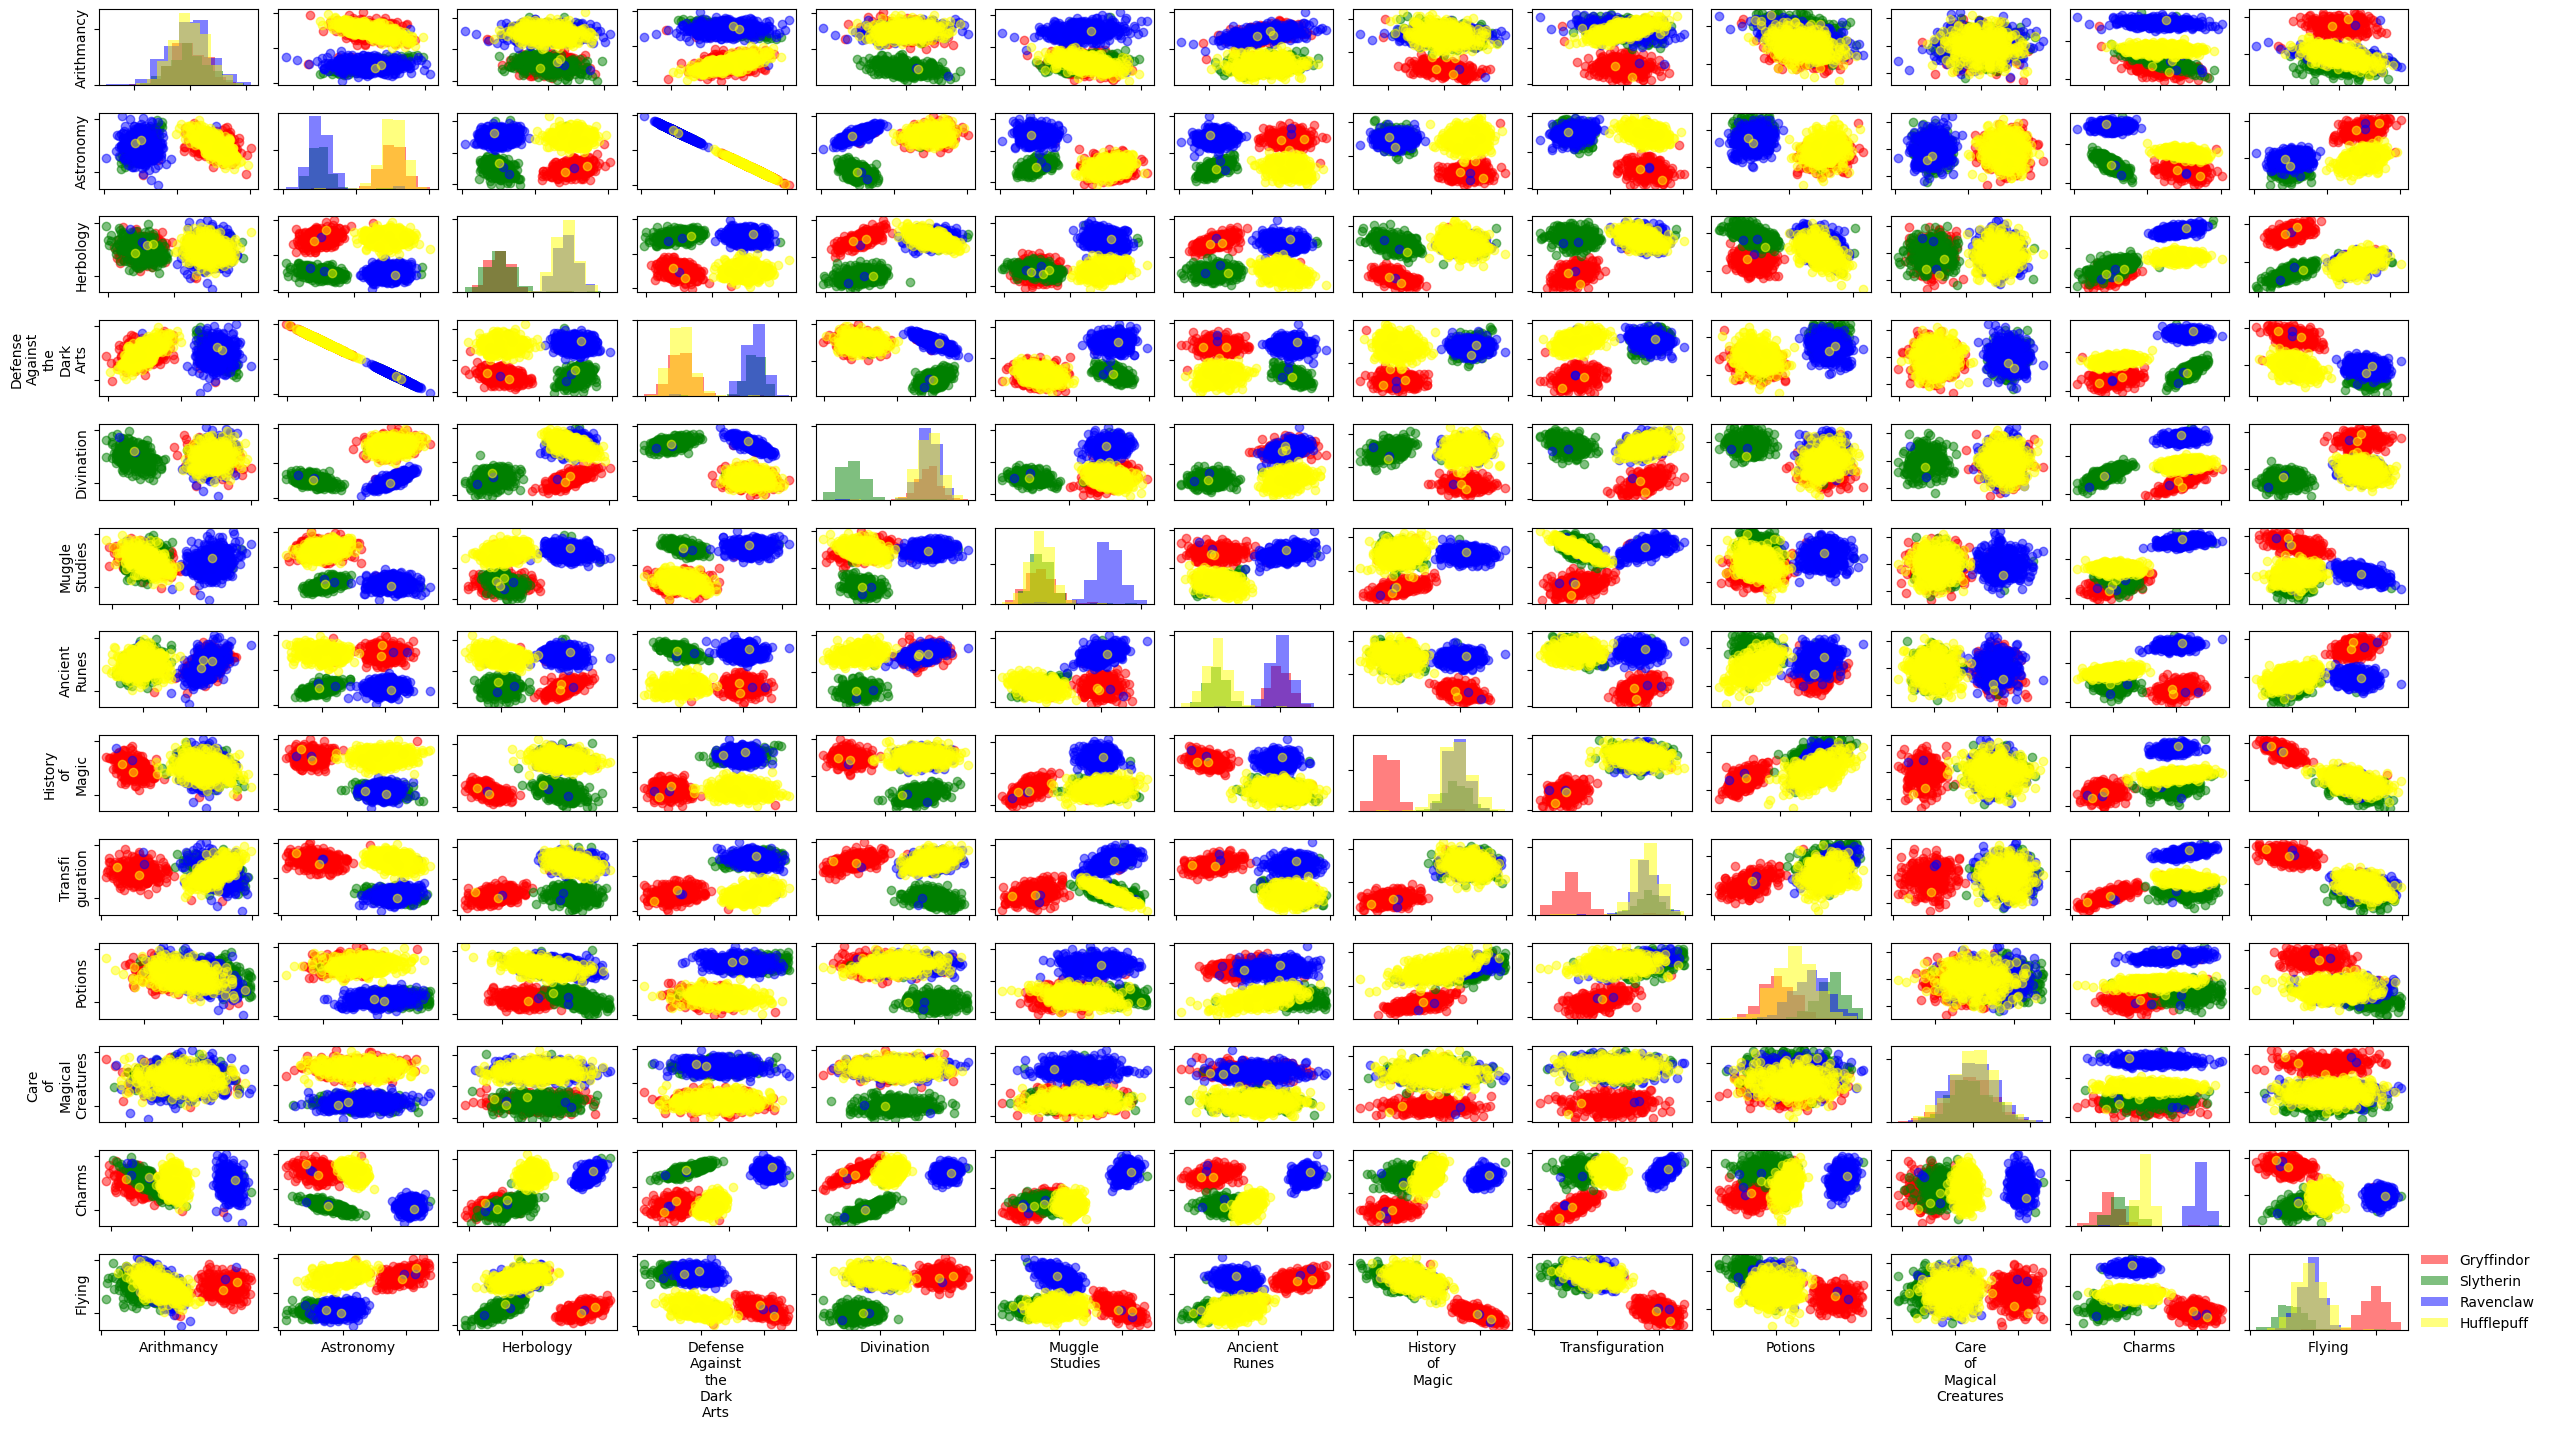

In [ ]:
def show_pair_plot(csv_path: str):
    # obtaining data for plotting
    df = HogwartsDataDescriber.read_csv(csv_path)
    courses = list(df.columns[6:])

    _, axs = plt.subplots(13, 13, figsize=(25.6, 14.4), tight_layout=True)
    for row_course, row_plt in zip(courses, axs):
        for i, (col_course, col_plt) in enumerate(zip(courses, row_plt)):
            # plotting
            if row_course == col_course:
                histogram(col_plt, df, row_course)
            else:
                scatter_plot(col_plt, df, row_course, col_course)

            # remove values from axis
            col_plt.tick_params(labelbottom=False)
            col_plt.tick_params(labelleft=False)

            # set x labels
            # if col_plt.is_last_row():
            if col_plt == axs[-1][i] : 
              col_plt.set_xlabel(col_course.replace(' ', '\n'))

            # set y labels
            if col_plt == row_plt[0]:
                label = row_course.replace(' ', '\n')
                length = len(label)
                if length > 14 and '\n' not in label:
                    label = label[:int(length/2)] + "\n" + \
                            label[int(length/2):]
                col_plt.set_ylabel(label)

    plt.legend(df.houses,
               loc='center left',
               frameon=False,
               bbox_to_anchor=(1, 0.5))
    plt.show()
show_pair_plot(data_path)

In [ ]:
df = HogwartsDataDescriber.read_csv(csv_path)
df.head()

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


## Clusters_3d_plot


In [ ]:
data = {'device': 'cpu',
      'lr': 0.2,
      'epochs': 1100,
      'batch_size': None,
      'seed': 42,
      'scale': 'minmax',
      'features': {
          'Arithmancy': False,
          'Astronomy': False,
          'Herbology': False,
          'Defense Against the Dark Arts': True,
          'Divination': True,
          'Muggle Studies': False,
          'Ancient Runes': True,
          'History of Magic': False,
          'Transfiguration': False,
          'Potions': False,
          'Care of Magical Creatures': False,
          'Charms': True,
          'Flying': True
      }}

with open('config.yaml', 'w') as file:
  yaml.dump(data, file)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append("..")

def clusters_3d(df, courses):
  """
  This function split data to clusters and visualise clusters mean values.
  """
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  cmap = plt.cm.get_cmap('gist_rainbow')
  ax.set_xlabel('YEAR')
  ax.set_ylabel('HAND')
  ax.set_zlabel('MEAN')
  ax.set_title('CLUSTERS')

  # REPLACE FULL BIRTHDAY DATE WITH YEAR: "2000-03-20" -> 2000
  years = np.empty(df['Birthday'].shape[0], dtype=np.int16)
  for i, b in enumerate(df['Birthday']):
    years[i] = b.split('-')[0]
  df['Birthday'] = years

  # REPLACE HAND WITH 0/1 VALUE
  bin_hands = np.empty(df['Best Hand'].shape[0], dtype=np.int8)
  for i, hand in enumerate(df['Best Hand'].unique()):
    bin_hands[df['Best Hand'] == hand] = i
  df['Best Hand'] = bin_hands

  for year in df['Birthday'].unique():
    for hand in df['Best Hand'].unique():
      for i, course in enumerate(courses):

        # CHOOSE INDEXES WHICH HAVE CLUSTERS BIRTHDAY AND BEST HAND
        mask = (df['Birthday'] == year) & (df['Best Hand'] == hand)
        cluster = np.array(df.loc[mask, course].dropna())

        # MIN - MAX SCALING
        cluster = (cluster - cluster.min()) /\
                  (cluster.max() - cluster.min())
        
        # CALCULATE MEAN IN CLUSTER
        mean = cluster.mean()

        if len(course) > 15:
          course = abbreviation(course)
        ax.scatter(year, hand, mean, 
                   color=cmap(round(i / courses.shape[0], 2)),
                   label=course)
  courses = [c if len(c) < 15 else abbreviation(c) for c in courses]
  ax.legend(courses)
  plt.show()

def vis_clusters_3d(data_path, config_path):

  # CHOOSE FROM CONFIG FEATURES TO PLOT
  config = Config(config_path)
  courses = config.choosed_features()
  df = pd.read_csv(data_path)
  clusters_3d(df, courses)


<ipython-input-11-b1f32238ccf5>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_rainbow')


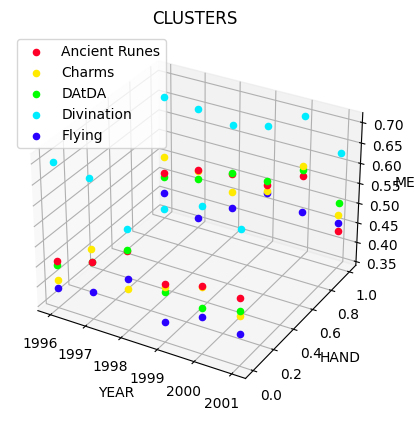

In [ ]:
data_path = "./dataset_train.csv"
config_path = './config.yaml'

vis_clusters_3d(data_path, config_path)

## Pytorch utils

In [ ]:
import torch
import numpy as np

def get_device(device):
  if 'cpu' not in device:
    if torch.cuda.is_available():
      device = torch.device(device)
    else:
      exit('Cuda not available')
  else:
    device = torch.device(device)
  return device

def to_tensor(x, device, dtype):
  return torch.from_numpy(x).to(device, dtype)

## Preprocessing

In [ ]:
import pandas as pd
from torch import Tensor

class StandardScale(object):
  """
  This method is widely used for normalization in
  many machine learning algorithms
  x' = (x - mean(x)) / std(x)
  """

  def fit(self, x):
    self.mean = x.mean(dim=0)
    self.std= x.std(dim=0)

  def __call__(self, x):
    return (x - self.mean) / self.std

  def to_dictionary(self):
    return {'mean': self.mean,
            'std': self.std}

  def from_dictionary(self,
                      dictionary,
                      device,
                      dtype):
    self.mean = dictionary['mean'].to(device, dtype)
    self.std  = dictionary['std'].to(device, dtype)

class MinMaxScale(object):
  """
  It is the simplest method and consists in rescaling the
  range of features to scale the range in [0, 1].
  x' = (x - min(x)) / (max(x) - min(x))
  """

  def fit(self, x):
    self.min = x.min(dim=0).values
    self.max = x.max(dim=0).values

  def __call__(self, x):
    return (x - self.min) / (self.max - self.min)
  
  def to_dictionary(self):
    return {'min': self.min,
            'max': self.max}
  
  def from_dictionary(self,
                      dictionary,
                      device,
                      dtype):
    self.min = dictionary["min"].to(device, dtype)
    self.max = dictionary["max"].to(device, dtype)


scale = {
    'minmax': MinMaxScale(),
    'standard': StandardScale()
}

def fill_na(df, courses):
  years = np.empty(df['Birthday'].shape[0], dtype=np.int16)
  for i, b in enumerate(df['Birthday']):
    years[i] = b.split('-')[0]
  df['Birthday'] = years

  for year in df['Birthday'].unique():
    for hand in df['Best Hand'].unique():
      for course in courses:
        
         # CHOOSE INDEXES WHICH HAVE CLUSTERS BIRTHDAY AND BEST HAND
          mask = (df['Birthday'] == year) & (df['Best Hand'] == hand)
          # CALCULATE MEAN IN CLUSTER
          val = df.loc[mask, course].mean()
          # FILL NAN VALUES WITH MEAN VALUE
          df.loc[mask, course] = df.loc[mask, course].fillna(val)
  return df


## Classifier

In [ ]:
class LogisticRegression(object):
  def __init__(self, device,
               dtype,
               batch_size,
               epochs=100,
               lr=0.001,
               save_hist=False):
    self.device = device
    self.dtype = dtype
    self.batch_size = batch_size
    self.lr = lr
    self.epochs = epochs
    self.iteration = 0
    self.hist = [] if save_hist else None
    
  def predict(self, x):
    """
    Calculate the probability of assigning input objects
    to the first class.
    :param x: tensor of shape (num_samples, num_features)
    :return: tensor of shape (num_samples)
    """
    return 1.0 / (1.0 + torch.exp(x @ - self.b - self.a)) 

  def fit(self, x, y):
    self.a = torch.randn(1).uniform_(-0.5, 0.5).to(self.device)
    self.b = torch.randn(x.shape[1]).uniform_(-0.5, 0.5).to(self.device)

    for self.iteration in range(self.epochs):
      
      perm = torch.randperm(x.shape[0])[:self.batch_size]

      tmp_a, tmp_b = self._calculate_anti_gradient(x[perm], y[perm])

      self.a += self.lr * tmp_a / perm.shape[0]
      self.b += self.lr * tmp_b / perm.shape[0]

      # SAVE HISTORY FOR FUTURE VISUALIZATION
      if self.hist is not None:
        self.hist.append(self._loss(x, y))

  def _calculate_anti_gradient(self, x, y):
    p = self.predict(x)
    dif = y - p

    da = torch.sum(dif)

    db = x.t() @ dif
    return da, db

  def _loss(self, x, y):
    p = self.predict(x) + 0.000001

    loss = torch.sum(y * torch.log(p) + (1.0 - y)*torch.log(1.0 - p)) / -x.shape[0]

    return float(loss.cpu().numpy())
  
  def to_dictionary(self):
    return {'a': self.a, 'b': self.b}
  
  def from_dictionary(self, dictionary):
    self.a = dictionary["a"].to(self.device, self.dtype)
    self.b = dictionary["b"].to(self.device, self.dtype)

## Multi classifier

In [ ]:
class OneVsAllLogisticRegression(object):
  def __init__(self, device, dtype, transform,
               lr = 0.001, 
               epochs = 100,
               batch_size = None,
               seed = None,
               save_hist = False):
    self.device = device
    self.dtype = dtype
    self.transform = transform
    self.lr = lr
    self.epochs = epochs
    self.models = []
    self.labels = None
    self.batch_size = batch_size
    self.save_hist = save_hist
    if type(seed) == int:
      torch.manual_seed(seed)
    
  def predict(self, x):
    if type(x) != torch.Tensor:
      x = to_tensor(x, self.device, self.dtype)

    p = []
    for model in self.models:
      p.append(model.predict(x))

    # LABELING ACCORDING TO BEST PREDICTION
    p = torch.stack(p).t()
    p = torch.argmax(p, dim=1).cpu()
    labels = self.labels[p]
    return labels

  def fit(self, x, y):
    if self.batch_size is None:
      self.batch_size = x.shape[0]

    x = to_tensor(x, self.device, self.dtype)

    # SPLIT LABELS INTO ONE-VS-ALL SETS
    # SPLIT LABELS INTO ONE-VS-ALL SETS
    bin_labels = self._split_labels(y)
    bin_labels = to_tensor(bin_labels, self.device, self.dtype)

    # SCALE GIVEN FEATURES
    if self.transform is not None:
      self.transform.fit(x)
      x = self.transform(x)

    for labels in bin_labels:
      # CREATE MODEL FOR CLASSIFICATION OF CURRENT LABEL
      model = LogisticRegression(self.device,
                                  self.dtype,
                                  self.batch_size,
                                  self.epochs,
                                  self.lr,
                                  self.save_hist)
      # TRAIN MODEL
      model.fit(x, labels)
      self.models.append(model)

def _split_labels(self, y):
    """
    Split labels into one-vs-all sets and binarize them
    :param y: array with labels of shape (num_samples)
    :return: array of shape (num_unique_labels, num_samples)
            with 0, 1 values
    """
    self.labels = np.unique(y)
    splitted_labels = np.zeros((self.labels.shape[0], y.shape[0]))

    for label, new_y in zip(self.labels, splitted_labels):
        new_y[np.where(y == label)] = 1
    return splitted_labels

def save(self, path):
    """
    Save model parameters
    :param path: path where to save weights
    :return: None
    """
    models_w = {"transform": self.transform.to_dictionary()}
    for model, label in zip(self.models, self.labels):
        models_w[label] = model.to_dictionary()
    torch.save(models_w, path)

def load(self, path):
    """
    Load model parameters from .pt file
    :param path: path to .pt file
    :return: None
    """
    models_w = torch.load(path)

    self.transform.from_dictionary(models_w.pop("transform"),
                                    self.device,
                                    self.dtype)
    self.labels = np.array(list(models_w.keys()))

    for w in models_w.values():
        model = LogisticRegression(self.device,
                                    self.dtype,
                                    self.batch_size,
                                    self.epochs,
                                    self.lr)
        model.from_dictionary(w)
        self.models.append(model)

In [ ]:
class OneVsAllLogisticRegression(object):

    def __init__(self,
                 device = "cpu",
                 dtype = torch.float32,
                 transform = None,
                 lr: float = 0.001,
                 epochs: int = 100,
                 batch_size = None,
                 seed = None,
                 save_hist = False):

        self.device = get_device(device)
        self.dtype = dtype
        self.transform = transform
        self.lr = lr
        self.epochs = epochs
        self.models = []
        self.labels = None
        self.batch_size = batch_size
        self.save_hist = save_hist
        if type(seed) == int:
            torch.manual_seed(seed)

    def predict(self, x):
        """
        Predict labels for given set
        :param x: tensor or array of shape (num_samples, num_features)
        :return: array of labels of shape (num_samples)
        """
        if type(x) != torch.Tensor:
            x = to_tensor(x, self.device, self.dtype)

        # SCALE GIVEN FEATURES
        if self.transform is not None:
            x = self.transform(x)

        # CALCULATE THE PROBABILITY OF ASSIGNING INPUT OBJECTS TO EACH CLASS
        p = []
        for model in self.models:
            p.append(model.predict(x))

        # LABELING ACCORDING TO BEST PREDICTION
        p = torch.stack(p).t()
        p = torch.argmax(p, dim=1).cpu()
        labels = self.labels[p]
        return labels

    def fit(self, x, y):
        """
        Train multiple logistic regression models on given training set.
        1 model per label
        :param x: tensor of shape (num_samples, num_features)
        :param y: array with labels of shape (num_samples)
        :return: None
        """
        if self.batch_size is None:
            self.batch_size = x.shape[0]

        x = to_tensor(x, self.device, self.dtype)

        # SPLIT LABELS INTO ONE-VS-ALL SETS
        bin_labels = self._split_labels(y)
        bin_labels = to_tensor(bin_labels, self.device, self.dtype)

        # SCALE GIVEN FEATURES
        if self.transform is not None:
            self.transform.fit(x)
            x = self.transform(x)

        for labels in bin_labels:
            # CREATE MODEL FOR CLASSIFICATION OF CURRENT LABEL
            model = LogisticRegression(self.device,
                                       self.dtype,
                                       self.batch_size,
                                       self.epochs,
                                       self.lr,
                                       self.save_hist)
            # TRAIN MODEL
            model.fit(x, labels)
            self.models.append(model)

    def _split_labels(self, y):
        """
        Split labels into one-vs-all sets and binarize them
        :param y: array with labels of shape (num_samples)
        :return: array of shape (num_unique_labels, num_samples)
                with 0, 1 values
        """
        self.labels = np.unique(y)
        splitted_labels = np.zeros((self.labels.shape[0], y.shape[0]))

        for label, new_y in zip(self.labels, splitted_labels):
            new_y[np.where(y == label)] = 1
        return splitted_labels

    def save(self, path):
        """
        Save model parameters
        :param path: path where to save weights
        :return: None
        """
        models_w = {"transform": self.transform.to_dictionary()}
        for model, label in zip(self.models, self.labels):
            models_w[label] = model.to_dictionary()
        torch.save(models_w, path)

    def load(self, path):
        """
        Load model parameters from .pt file
        :param path: path to .pt file
        :return: None
        """
        models_w = torch.load(path)

        self.transform.from_dictionary(models_w.pop("transform"),
                                       self.device,
                                       self.dtype)
        self.labels = np.array(list(models_w.keys()))

        for w in models_w.values():
            model = LogisticRegression(self.device,
                                       self.dtype,
                                       self.batch_size,
                                       self.epochs,
                                       self.lr)
            model.from_dictionary(w)
            self.models.append(model)

## logreg_train

Preparation time: 0.1068
Training time: 1.5579
All time: 1.6647


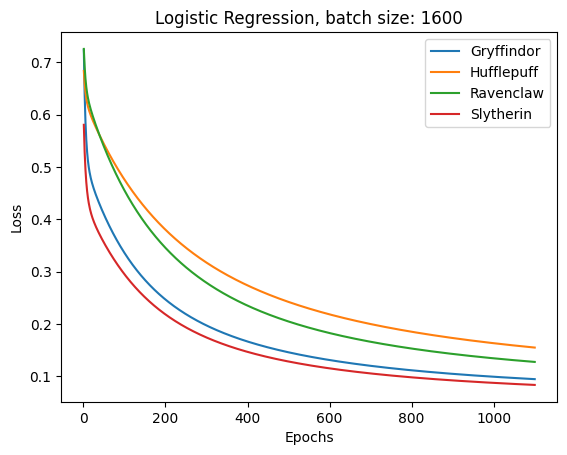

In [ ]:
from time import time
def plot_training(model: OneVsAllLogisticRegression):
    """
    Plot loss history
    :param model: trained model
    :return: None
    """
    _, ax = plt.subplots()

    epochs = range(1, model.epochs + 1)

    for sub_model, label in zip(model.models, model.labels):
        ax.plot(epochs, sub_model.hist, label=label)

    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Logistic Regression, batch size: {}'
                 .format(model.batch_size))
    ax.legend(loc="upper right")
    plt.show()

def train(data_path, weights_path, config_path, v=False):
  config = Config(config_path)
  courses = config.choosed_features()

  # READ TRAIN DATASET AND FILL NAN VALUES
  preparation_t = time()
  df = pd.read_csv(data_path)
  df = fill_na(df, courses)

  # CHOOSE FEATURE AND LABEL VALUES
  x = df[courses].values
  y = df["Hogwarts House"].values

  # CREATE MODEL TO TRAIN
  model = OneVsAllLogisticRegression(
        device=config.device,
        transform=scale[config.scale],
        lr=config.lr,
        epochs=config.epochs,
        batch_size=config.batch_size,
        seed=config.seed,
        save_hist=v
  )
  preparation_t = time() - preparation_t

  # TRAIN MODEL
  train_t = time()
  model.fit(x, y)
  train_t = time() - train_t

  # SAVE WEIGHTS AND SCALE PARAMS
  model.save(weights_path)

  print("Preparation time:", np.round(preparation_t, 4))
  print("Training time:", np.round(train_t, 4))
  print("All time:", np.round(preparation_t + train_t, 4))

  if v:
      plot_training(model)

data_path = '/content/dataset_train.csv'
config_path = '/content/config.yaml'
weights_path = './weights.pt'
train(data_path, weights_path, config_path, v=True)

## logreg predict

In [ ]:
"""
Script to predict labels with one-vs-all logistic regression.
It save predicted labels in houses.csv
"""

import os
import numpy as np
import pandas as pd
from time import time



def predict(data_path,
            weights_path,
            output_folder,
            config_path):
    # CHOOSE FROM CONFIG FEATURES TO PREDICT
    config = Config(config_path)
    courses = config.choosed_features()

    preparation_t = time()

    # READ TEST DATASET AND FILL NAN VALUES
    df = pd.read_csv(data_path)
    df = fill_na(df, courses)

    # CHOOSE FEATURE VALUES
    x = df[courses].values

    # CREATE MODEL
    model = OneVsAllLogisticRegression(
        device=config.device,
        transform=scale[config.scale],
    )

    # LOAD MODEL WEIGHTS
    model.load(weights_path)

    preparation_t = time() - preparation_t

    # PREDICT
    predict_t = time()
    p = model.predict(x)
    predict_t = time() - predict_t

    # SAVE PREDICTED VALUES
    pred = pd.DataFrame(p, columns=["Hogwarts House"])
    pred.to_csv(os.path.join(output_folder, "houses.csv"),
                index_label="Index")

    print("Preparation time:", np.round(preparation_t, 4))
    print("Prediction time:", np.round(predict_t, 4))
    print("All time:", np.round(preparation_t + predict_t, 4))

output_folder = './'
predict(data_path,weights_path,output_folder, config_path)

Preparation time: 0.1001
Prediction time: 0.0015
All time: 0.1016


In [ ]:
pd.read_csv('./houses.csv')

,Index,Hogwarts House
0,0,Ravenclaw
1,1,Slytherin
2,2,Ravenclaw
3,3,Gryffindor
4,4,Gryffindor
...,...,...
1595,1595,Gryffindor
1596,1596,Hufflepuff
1597,1597,Gryffindor
1598,1598,Hufflepuff


## Evaluate

Training:
Preparation time: 0.0975
Training time: 1.5335
All time: 1.631


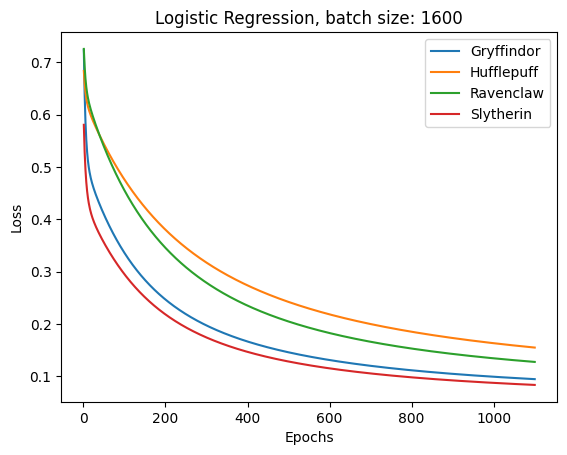

++++++++++++++++++++++++++++++
Predicting:
Preparation time: 0.0907
Prediction time: 0.0006
All time: 0.0914
------------------------------
Wrong predictions: 4
Accuracy: 0.99


In [ ]:
import os
import numpy as np
import pandas as pd

def accuracy_score(y_true, y_pred):
    """
    Accuracy classification score
    :param y_true: ground truth samples
    :param y_pred: predictions. Same shape as y_true
    :return: float
    """
    return sum(y_pred == y_true) / len(y_true)


def evaluate(train_path,
             test_path,
             truth_path,
             weights_path,
             output_folder,
             config_path,
             v = False):

    print("Training:")
    train(train_path, weights_path, config_path, v)
    print('+' * 30)

    print("Predicting:")
    predict(test_path, weights_path, output_folder, config_path)
    print('-' * 30)

    pred = pd.read_csv(os.path.join(output_folder, "houses.csv"))
    true = pd.read_csv(truth_path)

    y_pred = pred['Hogwarts House']
    y_true = true['Hogwarts House']

    print("Wrong predictions:", np.sum(y_true != y_pred))
    print("Accuracy:", np.round(accuracy_score(y_true, y_pred), 4))

train_path = '/content/dataset_train.csv'
test_path = '/content/dataset_test.csv'
truth_path = '/content/dataset_truth.csv'

evaluate(train_path,
             test_path,
             truth_path,
             weights_path,
             output_folder,
             config_path,
             v = True)

## End